In [1]:
import plotly
import plotly.plotly as py

In [3]:
from stocker import Stocker

In [4]:
tesla = Stocker('TSLA')

TSLA Stocker Initialized. Data covers 2010-06-29 00:00:00 to 2018-03-27 00:00:00.


In [5]:
stock_history = tesla.stock
stock_history.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010-06-29,23.89,4.89
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010-06-30,23.83,-1.96
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010-07-01,21.96,-3.04
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010-07-02,19.20,-3.80
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010-07-06,16.11,-3.89


Maximum Adj. Close = 385.00 on 2017-09-18 00:00:00.
Minimum Adj. Close = 15.80 on 2010-07-07 00:00:00.
Current Adj. Close = 279.18 on 2018-03-27 00:00:00.



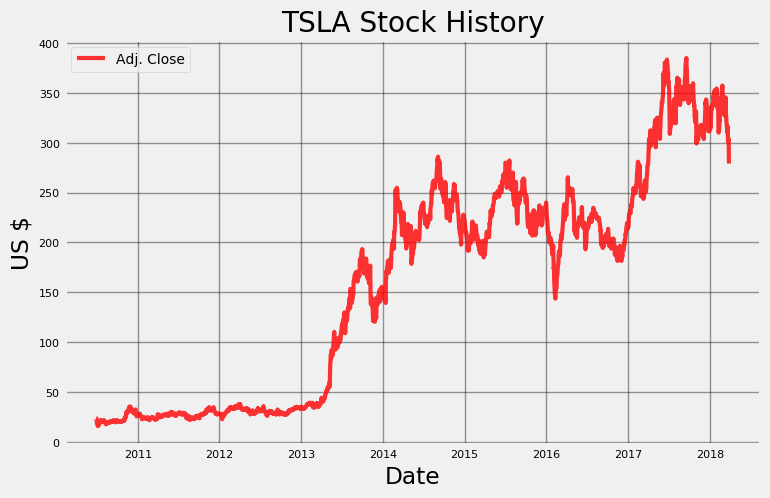

In [6]:
tesla.plot_stock()

Maximum Daily Change = 20.77 on 2014-01-14 00:00:00.
Minimum Daily Change = -27.95 on 2018-02-08 00:00:00.
Current Daily Change = -24.82 on 2018-03-27 00:00:00.

Maximum Adj. Volume = 37163900.00 on 2013-05-14 00:00:00.
Minimum Adj. Volume = 118500.00 on 2010-10-25 00:00:00.
Current Adj. Volume = 13696168.00 on 2018-03-27 00:00:00.



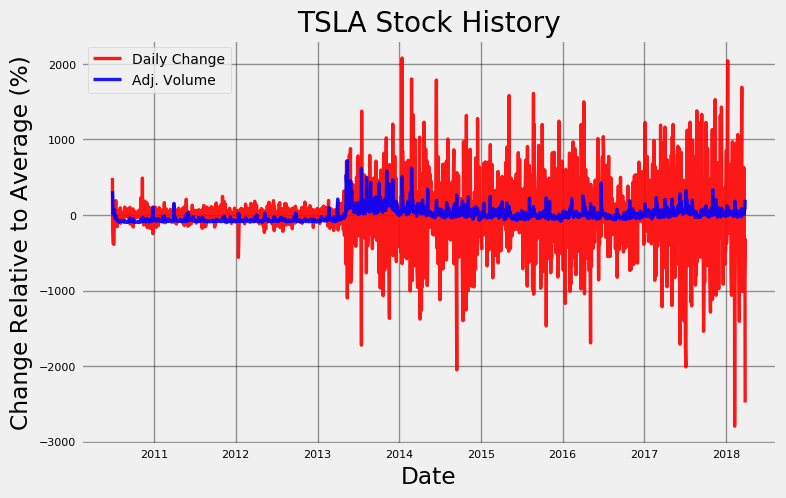

In [7]:
tesla.plot_stock(start_date='2010-06-29',end_date='2018-03-27',
                 stats=['Daily Change','Adj. Volume'],plot_type='pct')

TSLA Total buy and hold profit from 2010-06-29 00:00:00 to 2018-03-27 00:00:00 for 500 shares = $130090.00


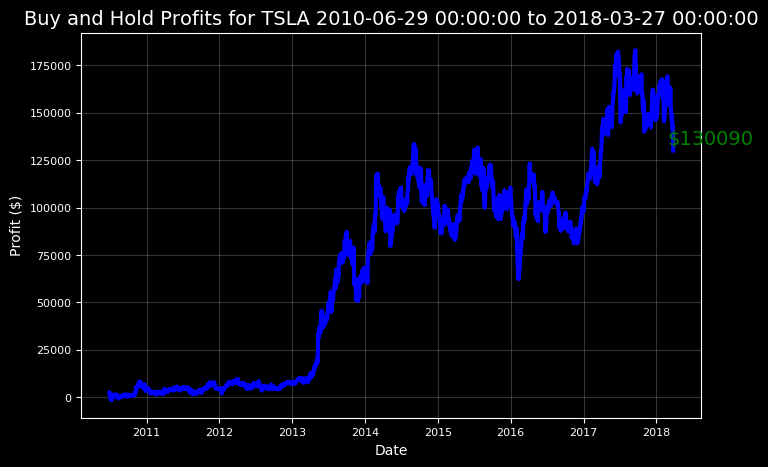

In [11]:
tesla.buy_and_hold(nshares=500)

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



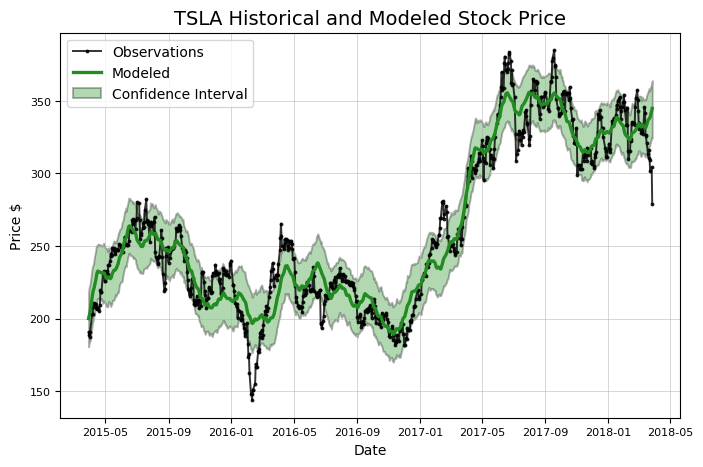

In [12]:
model,model_data= tesla.create_prophet_model()

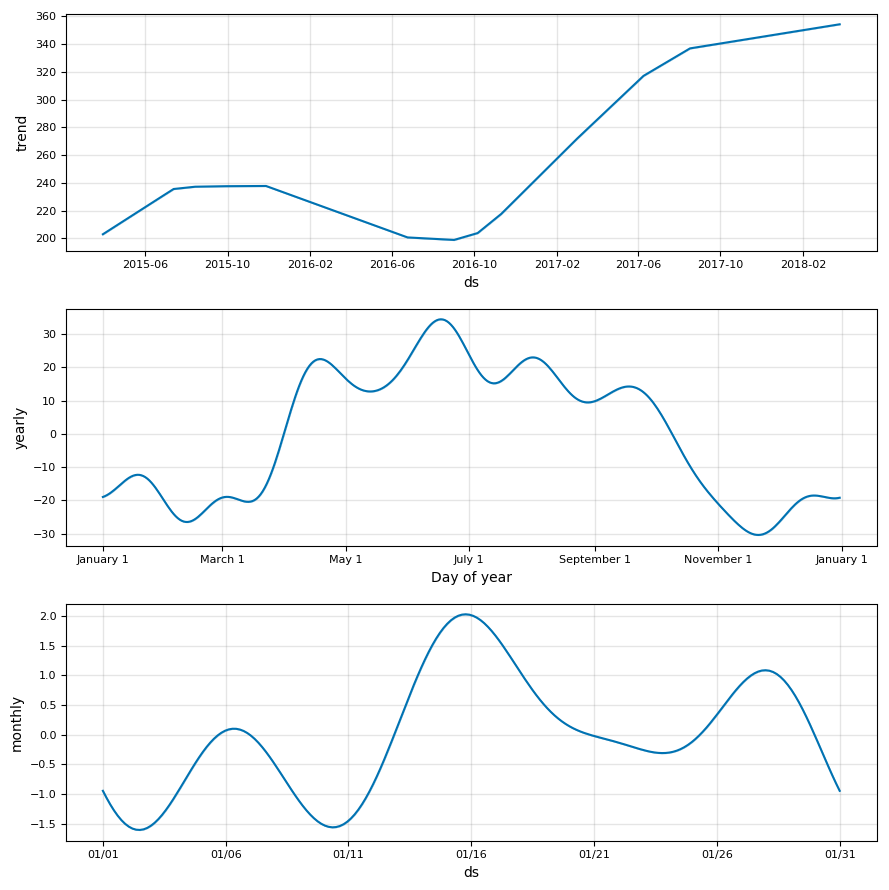

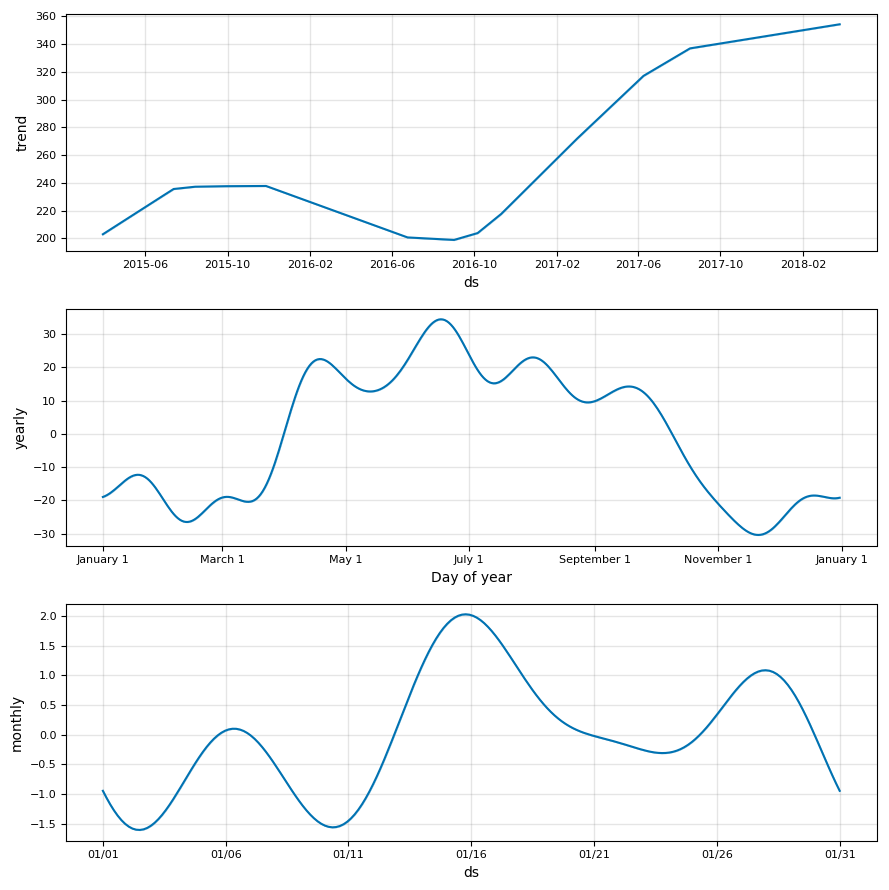

In [13]:
model.plot_components(model_data)

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
72  2015-07-13      262.16 -0.728114
385 2016-10-06      201.00  0.711447
602 2017-08-17      351.92 -0.593784
169 2015-11-27      231.61 -0.509165
554 2017-06-09      357.32 -0.488600


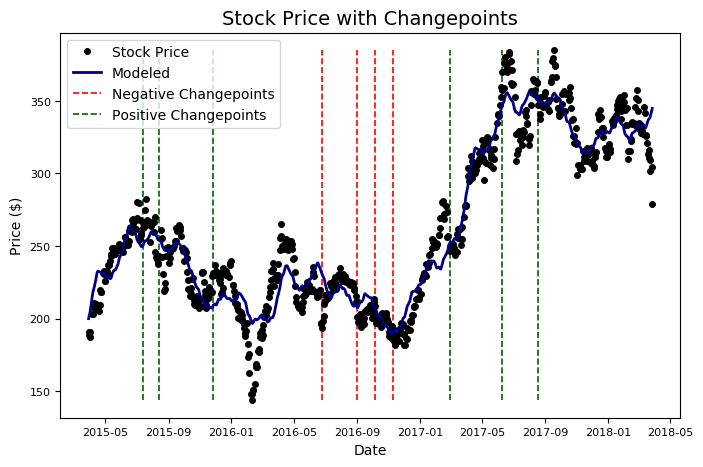

In [22]:
tesla.changepoint_date_analysis()

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Predicted Price on 2018-06-25 00:00:00 = $393.06


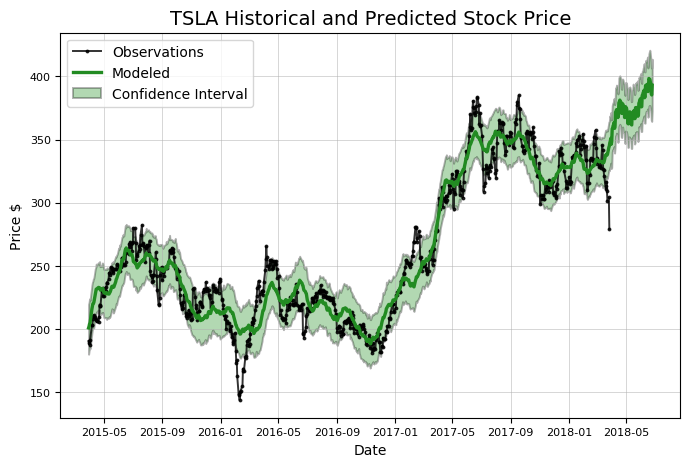

In [24]:
tesla.weekly_seasonality=True
model,model_data=tesla.create_prophet_model(days=90)


Prediction Range: 2017-03-27 00:00:00 to 2018-03-27 00:00:00.

Predicted price on 2018-03-24 00:00:00 = $436.36.
Actual price on    2018-03-23 00:00:00 = $301.54.

Average Absolute Error on Training Data = $12.55.
Average Absolute Error on Testing  Data = $29.61.

When the model predicted an increase, the price increased 47.44% of the time.
When the model predicted a  decrease, the price decreased  44.09% of the time.

The actual value was within the 80% confidence interval 68.00% of the time.


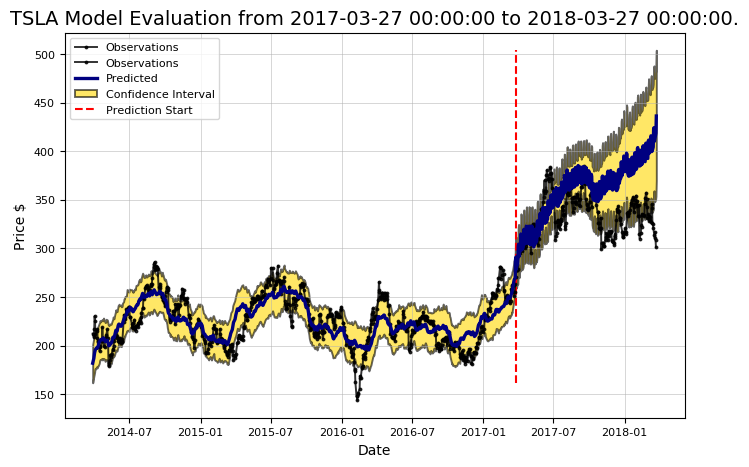

In [25]:
tesla.evaluate_prediction()

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



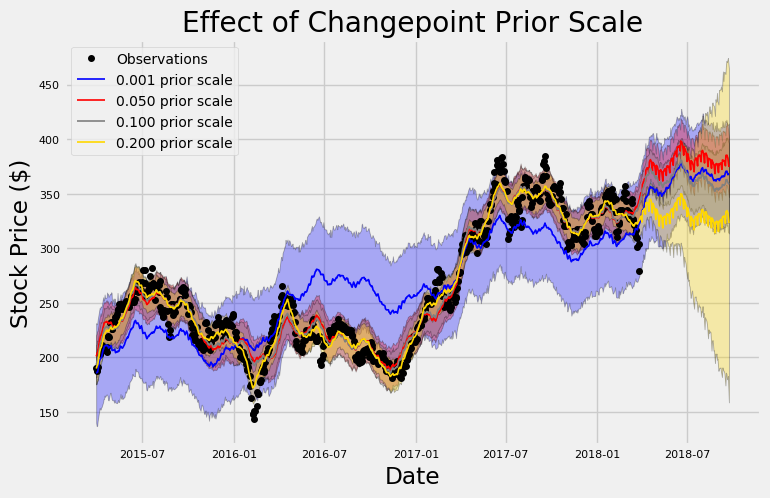

In [26]:
tesla.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Validation Range 2016-01-04 00:00:00 to 2017-01-03 00:00:00.



/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



     cps  train_err  train_range    test_err  test_range
0  0.001  29.812689    89.955083  121.996427   90.242011
1  0.050  13.022537    40.623456   30.540667   46.585255
2  0.100   9.471903    29.980124   27.874873  168.003462
3  0.200   7.191993    23.253025   83.762532  358.328050


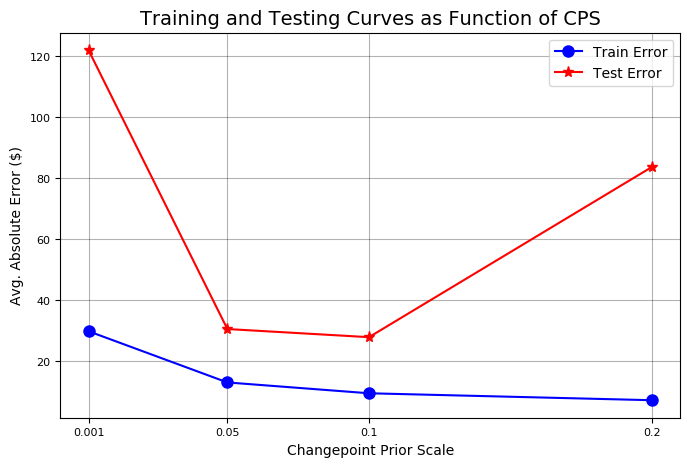

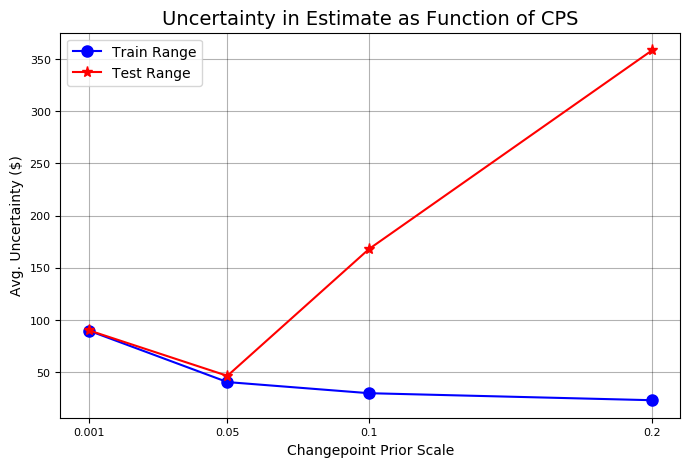

In [27]:
tesla.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Validation Range 2016-01-04 00:00:00 to 2017-01-03 00:00:00.



/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



    cps  train_err  train_range    test_err  test_range
0  0.15   7.513823    24.214141   62.693387  333.466236
1  0.20   7.191993    23.248318   83.762532  370.782088
2  0.25   6.983674    22.466500   99.238433  410.194113
3  0.40   6.588787    21.202251  122.374386  505.643512
4  0.50   6.469724    20.929085  133.226795  531.495010
5  0.60   6.392211    20.630538  138.303482  565.309642


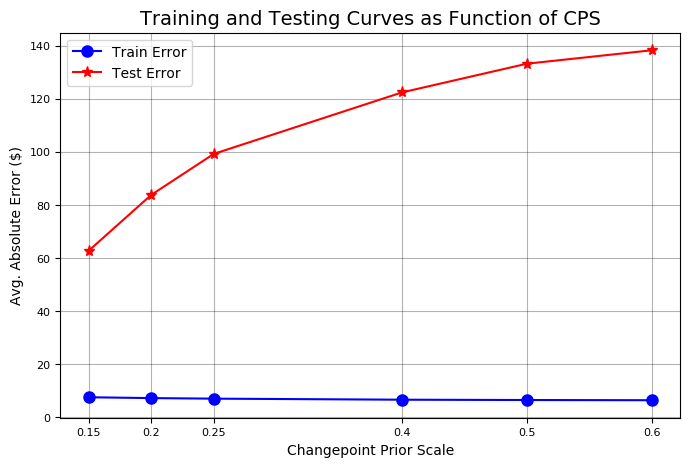

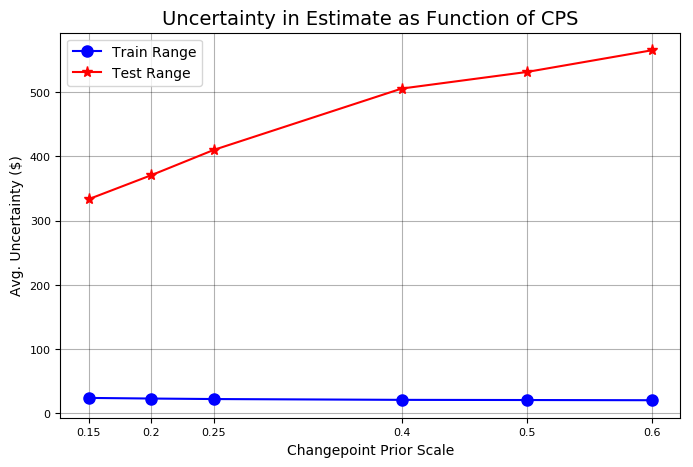

In [28]:
tesla.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.15, 0.2, 0.25,0.4, 0.5, 0.6])

In [29]:
tesla.changepoint_prior_scale = 0.5

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




Prediction Range: 2017-03-27 00:00:00 to 2018-03-27 00:00:00.

Predicted price on 2018-03-24 00:00:00 = $284.94.
Actual price on    2018-03-23 00:00:00 = $301.54.

Average Absolute Error on Training Data = $7.69.
Average Absolute Error on Testing  Data = $82.41.

When the model predicted an increase, the price increased 45.74% of the time.
When the model predicted a  decrease, the price decreased  44.17% of the time.

The actual value was within the 80% confidence interval 73.20% of the time.


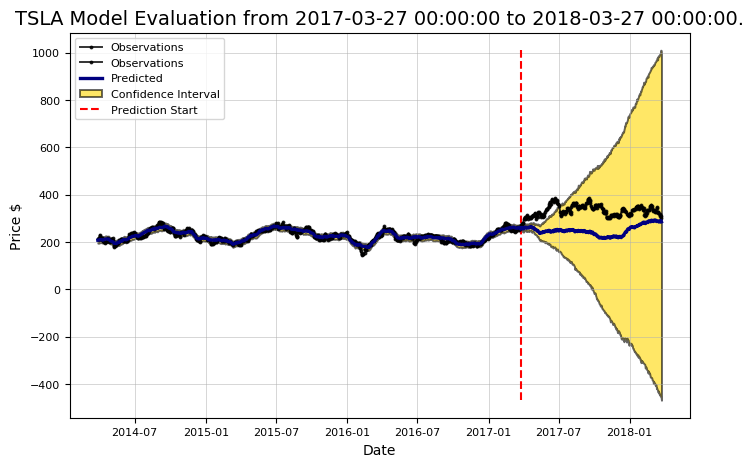

In [31]:
tesla.evaluate_prediction()

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




Predicted Increase: 

         Date    estimate    change       upper       lower
1  2018-03-28  321.729985  1.553800  333.314306  309.049693
2  2018-03-29  322.092583  0.362597  334.255152  310.222948
3  2018-03-30  323.339027  1.246445  335.208715  311.643394
6  2018-04-02  326.340124  9.342021  338.463000  313.843353
8  2018-04-04  327.204928  0.935447  339.747576  315.589900
9  2018-04-05  327.237261  0.032333  339.249519  314.489224
10 2018-04-06  328.290240  1.052979  340.533618  315.695949
13 2018-04-09  330.665744  9.174455  344.160225  317.759073
15 2018-04-11  331.152013  0.667464  343.810141  317.394336
20 2018-04-16  329.851582  8.623727  344.427138  314.584492
22 2018-04-18  330.057148  0.539999  345.833206  313.553975
27 2018-04-23  323.877207  7.280691  339.581172  305.850135

Predicted Decrease: 

         Date    estimate     change       upper       lower
5  2018-04-01  316.998103  -6.340925  329.425972  305.523540
7  2018-04-03  326.269481  -0.070643  338.264018  31

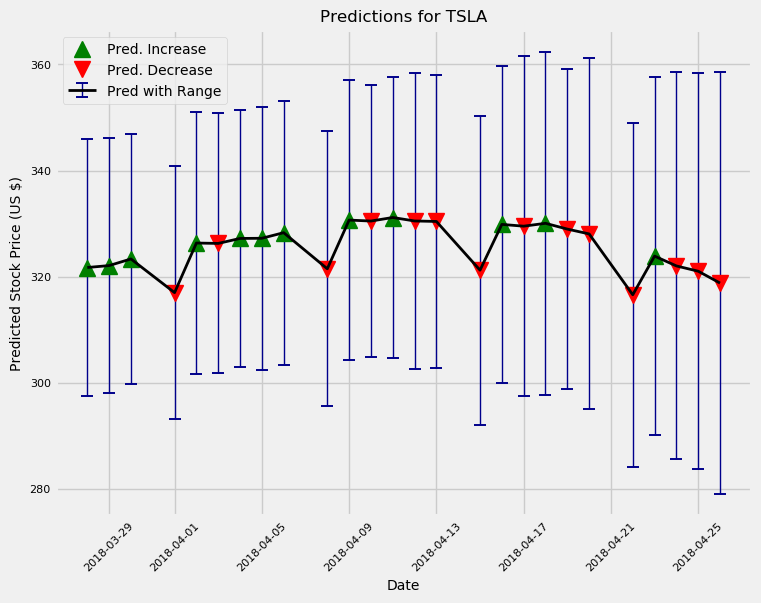

In [32]:
tesla.predict_future()

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




Predicted Increase: 

         Date    estimate     change       upper       lower
1  2018-03-28  321.729985   1.553800  333.802379  310.257080
2  2018-03-29  322.092583   0.362597  334.025355  309.675495
3  2018-03-30  323.339027   1.246445  335.096722  310.736754
6  2018-04-02  326.340124   9.342021  337.968776  313.381504
8  2018-04-04  327.204928   0.935447  339.550191  314.600839
9  2018-04-05  327.237261   0.032333  338.423017  315.399611
10 2018-04-06  328.290240   1.052979  339.840661  315.813307
13 2018-04-09  330.665744   9.174455  343.588728  316.381911
15 2018-04-11  331.152013   0.667464  344.237474  318.543443
20 2018-04-16  329.851582   8.623727  343.308637  315.566261
22 2018-04-18  330.057148   0.539999  344.133537  315.080883
27 2018-04-23  323.877207   7.280691  340.414762  308.185331
34 2018-04-30  316.503957   8.449465  336.921751  295.809822
41 2018-05-07  309.316915   9.038301  335.675493  282.735879
48 2018-05-14  307.029474   9.114916  340.345016  272.766708
5

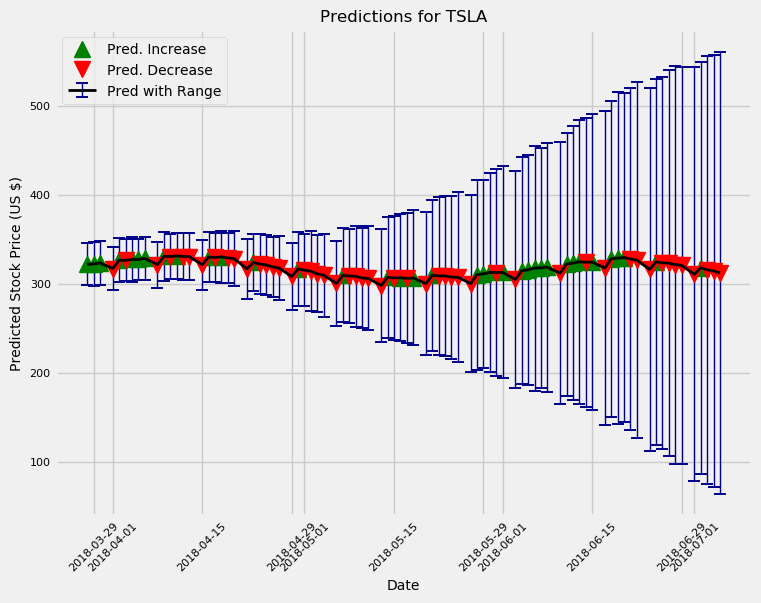

In [39]:
tesla.predict_future(days=100)

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




Predicted Increase: 

         Date    estimate    change       upper       lower
1  2018-03-28  321.729985  1.553800  332.749782  310.045489
2  2018-03-29  322.092583  0.362597  333.271084  310.391315
3  2018-03-30  323.339027  1.246445  334.858481  311.921535
6  2018-04-02  326.340124  9.342021  338.322607  314.932908
8  2018-04-04  327.204928  0.935447  339.308024  315.109526
9  2018-04-05  327.237261  0.032333  339.393780  314.059349
10 2018-04-06  328.290240  1.052979  340.255330  315.895221
13 2018-04-09  330.665744  9.174455  344.117076  317.942482
15 2018-04-11  331.152013  0.667464  343.837179  318.659269
20 2018-04-16  329.851582  8.623727  345.263562  316.203541
22 2018-04-18  330.057148  0.539999  345.096502  314.760777
27 2018-04-23  323.877207  7.280691  340.003882  305.851082

Predicted Decrease: 

         Date    estimate     change       upper       lower
5  2018-04-01  316.998103  -6.340925  329.674188  304.409906
7  2018-04-03  326.269481  -0.070643  339.384354  31

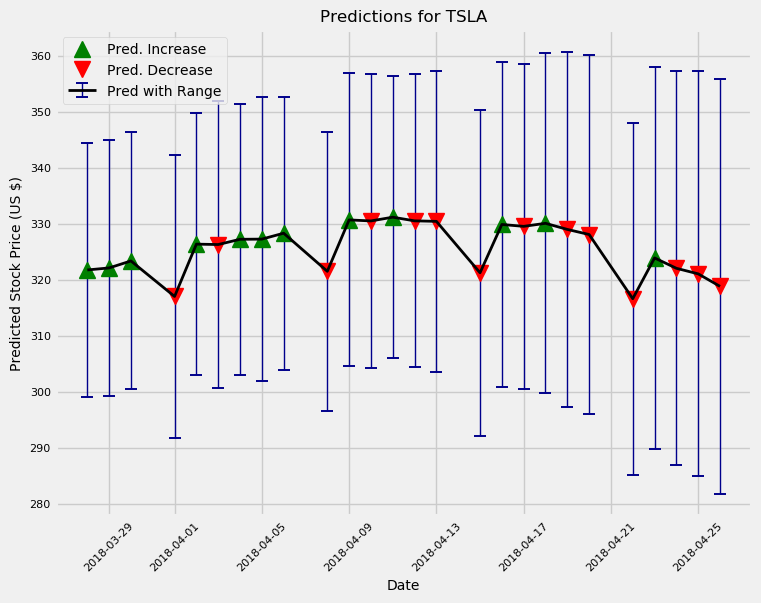

In [40]:
df = tesla.predict_future()

In [59]:
df = tesla.make_df(start_date='2010-06-29',end_date='2018-03-27')
print(df.shape)
df.head()

(1949, 16)


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010-06-29,23.89,4.89
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010-06-30,23.83,-1.96
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010-07-01,21.96,-3.04
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010-07-02,19.20,-3.80
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010-07-06,16.11,-3.89


In [64]:
up_days = []
down_days = []

for i in range(0,len(df)):
    if df['Daily Change'][i] > 0:
        up_days.append(1)
        down_days.append(0)
    elif df['Daily Change'][i] < 0:
        down_days.append(1)
        up_days.append(0)
    else:
        down_days.append(0)
        up_days.append(0)
print(len(up_days))
print(len(down_days))
df['Up Days'] = up_days
df['Down Days'] = down_days
df.head()

1949
1949


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change,Up Days,Down Days
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010-06-29,23.89,4.89,1,0
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010-06-30,23.83,-1.96,0,1
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010-07-01,21.96,-3.04,0,1
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010-07-02,19.20,-3.80,0,1
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010-07-06,16.11,-3.89,0,1


In [43]:
def make_a_future_dataframe(self,periods=30,freq='D'):
    '''
        Added by Chris Louie for stockly
    '''
    train = self.stock[self.stock['Date'] > (max(self.stock['Date']) - pd.DateOffset(years=self.training_years))]
    
    model = self.create_model()
    model.fit(train)
    
    future = model.make_future_dataframe(periods=periods,freq=freq)
    future = model.predict(future)
    
    preds = future[future['ds'] >= max(self.stock['Date'])]
    preds = self.remove_weekends(preds)
    preds['diff'] = preds['yhat'].diff()
    preds = preds.dropna()
    preds['direction'] = (preds['diff'] > 0) * 1
    preds = preds.rename(columns={
        'ds': 'Date', 'yhat': 'estimate', 'diff': 'change', 
        'yhat_upper': 'upper', 'yhat_lower': 'lower'
    })
    
    return preds
    

In [ ]:
def auto_make_a_df(self, start_date=self.min_date, end_date=self.max_date,df=None):
    '''
        Added by Chris Louie for stockly
    '''
    # Default is to use the object stock data
    if not df:
        df = self.stock.copy()


    start_date, end_date = self.handle_dates(start_date, end_date)

    # keep track of whether the start and end dates are in the data
    start_in = True
    end_in = True

    # If user wants to round dates (default behavior)
    if self.round_dates:
        # Record if start and end date are in df
        if (start_date not in list(df['Date'])):
            start_in = False
        if (end_date not in list(df['Date'])):
            end_in = False

        # If both are not in dataframe, round both
        if (not end_in) & (not start_in):
            trim_df = df[(df['Date'] >= start_date) & 
                         (df['Date'] <= end_date)]

        else:
            # If both are in dataframe, round neither
            if (end_in) & (start_in):
                trim_df = df[(df['Date'] >= start_date) & 
                             (df['Date'] <= end_date)]
            else:
                # If only start is missing, round start
                if (not start_in):
                    trim_df = df[(df['Date'] > start_date) & 
                                 (df['Date'] <= end_date)]
                # If only end is imssing round end
                elif (not end_in):
                    trim_df = df[(df['Date'] >= start_date) & 
                                 (df['Date'] < end_date)]


    else:
        valid_start = False
        valid_end = False
        while (not valid_start) & (not valid_end):
            start_date, end_date = self.handle_dates(start_date, end_date)

            # No round dates, if either data not in, print message and return
            if (start_date in list(df['Date'])):
                valid_start = True
            if (end_date in list(df['Date'])):
                valid_end = True

            # Check to make sure dates are in the data
            if (start_date not in list(df['Date'])):
                print('Start Date not in data (either out of range or not a trading day.)')
                start_date = pd.to_datetime(input(prompt='Enter a new start date: '))

            elif (end_date not in list(df['Date'])):
                print('End Date not in data (either out of range or not a trading day.)')
                end_date = pd.to_datetime(input(prompt='Enter a new end date: ') )

        # Dates are not rounded
        trim_df = df[(df['Date'] >= start_date) & 
                     (df['Date'] <= end_date.date)]

    


    return trim_df